In [322]:
### To predict solar_generation
# Inputs:
# current_solar_generation

# month = observation[0]
### hour = observation[2]

# outdoor_dry_bulb_temperature = observation[3]

# outdoor_relative_humidity = observation[7]

# diffuse_solar_irradiance = observation[11]
### diffuse_solar_irradiance_predicted_6h = observation[12]

# direct_solar_irradiance = observation[15]
### direct_solar_irradiance_predicted_6h = observation[16]

# Labels
# next_solar_generation = observation[21]

In [323]:
from data import citylearn_challenge_2022_phase_1 as competition_data
import os.path as osp
import pandas as pd
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import numpy as np


weather_path = osp.join(osp.dirname(competition_data.__file__), "weather.csv")
building_1_path = osp.join(osp.dirname(competition_data.__file__), "Building_1.csv")

df_building_1_all = pd.read_csv(building_1_path)
df_building_1 = df_building_1_all[["Month", "Hour"]]

In [324]:
from datetime import datetime, timedelta

start = datetime.strptime('2000-08-01', '%Y-%m-%d')

all_dates = [start + timedelta(hours=x) for x in range(8760)]

In [325]:
df_weather_all = pd.read_csv(weather_path)
df_weather = df_weather_all[["Outdoor Drybulb Temperature [C]", "Relative Humidity [%]", "Diffuse Solar Radiation [W/m2]", "Direct Solar Radiation [W/m2]"]]

df_building_1_current_solar_generation = df_building_1_all[["Solar Generation [W/kW]"]]
df_labels_building_1 = df_building_1_all[["Solar Generation [W/kW]"]]
df_labels_building_1 = df_labels_building_1.shift(-1)

In [326]:
df_data_building_1 = df_weather
df_data_building_1["Solar Generation [W/kW]"] = df_building_1_current_solar_generation

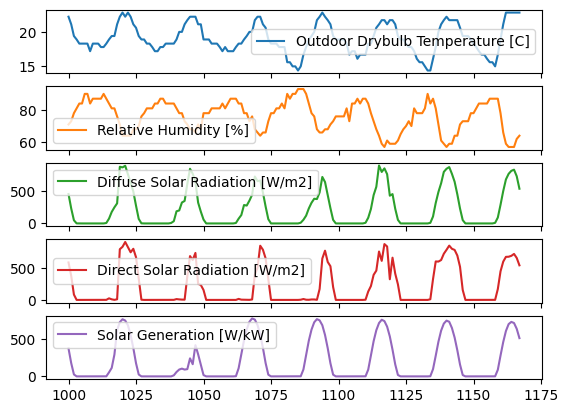

In [327]:
ax = df_data_building_1[1000:1168][list(df_data_building_1.columns)].plot(subplots=True)

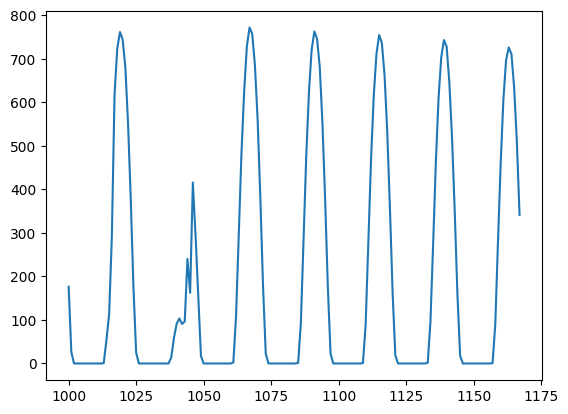

In [328]:
plt.plot(df_labels_building_1[1000:1168])

In [329]:
df_data_building_1["ds"] = all_dates
df_data_building_1["y"] = df_labels_building_1
df_data_building_1 = df_data_building_1[:8759]

In [330]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_data_building_1[["Outdoor Drybulb Temperature [C]", "Relative Humidity [%]", "Diffuse Solar Radiation [W/m2]", "Direct Solar Radiation [W/m2]", "y", "Solar Generation [W/kW]"]] = scaler.fit_transform(df_data_building_1[["Outdoor Drybulb Temperature [C]", "Relative Humidity [%]", "Diffuse Solar Radiation [W/m2]", "Direct Solar Radiation [W/m2]", "y", "Solar Generation [W/kW]"]])
df_data_building_1

,Outdoor Drybulb Temperature [C],Relative Humidity [%],Diffuse Solar Radiation [W/m2],Direct Solar Radiation [W/m2],Solar Generation [W/kW],ds,y
0,0.541353,0.822222,0.000000,0.000000,0.000000,2000-08-01 00:00:00,0.000000
1,0.545113,0.766667,0.000000,0.000000,0.000000,2000-08-01 01:00:00,0.000000
2,0.530075,0.755556,0.000000,0.000000,0.000000,2000-08-01 02:00:00,0.000000
3,0.515038,0.755556,0.000000,0.000000,0.000000,2000-08-01 03:00:00,0.000000
4,0.500000,0.755556,0.000000,0.000000,0.000000,2000-08-01 04:00:00,0.000000
...,...,...,...,...,...,...,...
8754,0.582707,0.788889,0.214356,0.303253,0.079787,2001-07-31 18:00:00,0.008199
8755,0.563910,0.822222,0.025565,0.136411,0.008199,2001-07-31 19:00:00,0.000000
8756,0.582707,0.788889,0.000000,0.000000,0.000000,2001-07-31 20:00:00,0.000000
8757,0.605263,0.766667,0.000000,0.000000,0.000000,2001-07-31 21:00:00,0.000000


In [280]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

# df_data_building_1.set_index('ds', inplace=True)
df_data_building_1.sort_index(inplace=True)
X = df_data_building_1.drop(labels=['y'], axis=1)
y = df_data_building_1['y']

In [283]:
from scalecast.Forecaster import Forecaster
f = Forecaster(y=df_data_building_1['y'], current_dates=df_data_building_1['ds'])

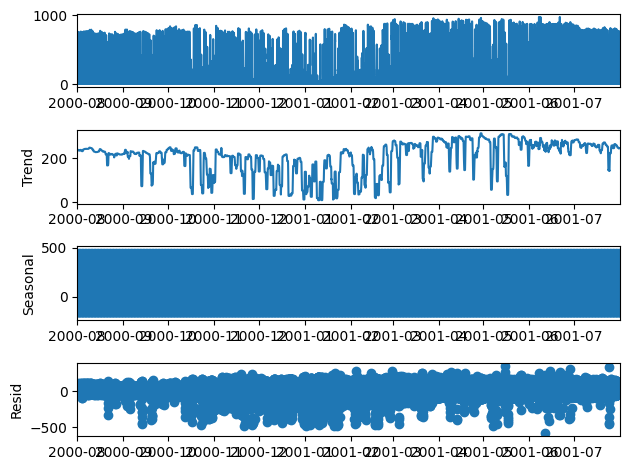

In [284]:
f.seasonal_decompose().plot()
plt.show()

In [269]:
f.set_test_length(24)       # 1. 12 observations to test the results
f.generate_future_dates(1) # 2. 12 future points to forecast
f.set_estimator('arima')     # 3. LSTM neural network


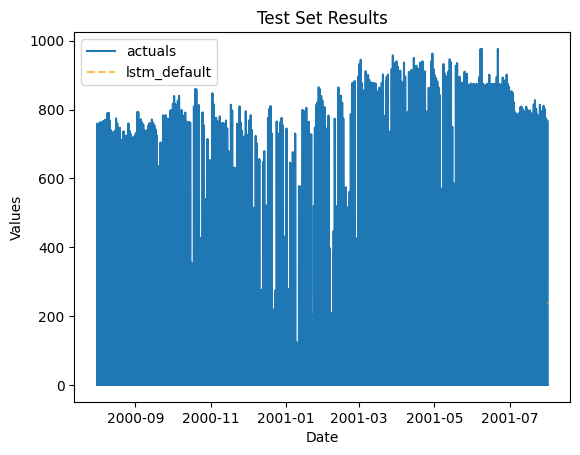

In [270]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set()